## DATA ANALYSIS
## WHAT MAKES A STUDENT PREFER A UNIVERSITY?

The aim of this project is to find out which are the most relevant features that students consider to choose the preferred American university. Some of the essential questions for developing this project are related to the number of applications, admissions, and enrollments, cost of tuition and fees, cost of living on campus, types of degrees offered, and features of the states where universities are located (population and GDP).

# Let's import the requited library

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")
import random

Setup Complete


In [38]:
#!pip install pyspark --upgrade

In [39]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

ModuleNotFoundError: No module named 'pyspark'

## Load the file in Pandas DF 

In [ ]:
## starting the data analysis 

university_df = pd.read_csv("../input/university-selection-analysis/universities_data.csv")
university_df.head(5)

# 2. DATA TREATMENT: CLEANING AND FORMATTING*

Let's begin this step by looking at the shape (number of rows and columns) of the dataset.

In [ ]:
university_df.info()

In this case, only three dtypes have been recognized: float64, int64, and object.

If we take a look at the number of non-null elements of each column we can see that many columns, for example the column SAT Writing 75th percentile score, contain several null or NaN values.

In [ ]:

## NOTE : remember this useful code for cols analysis 
cols = university_df.columns
[(c , len(university_df[c]) , university_df[c].notnull().sum() , university_df[c].isnull().sum()  ) for c in cols]

In [ ]:
# !pip install jovian --upgrade -q
# import jovian
# jovian.commit(filename='universities_selection-kaggle',files=['universities_data.csv'])

In [ ]:
university_df.describe()

In [ ]:
university_df.shape

## 2.1 Working with missing, incorrect, and invalid data
Missing, incorrect, and invalid data need to be addressed to avert possible misleading mathematical operations. There are pandas functions, for example mean(), that exclude NaN values by default; however, other numerical operations consider all values, including missing values, to perform those operations. This will lead to wrong results. Incorrect and invalid data will also result in wrong outcomes. For these reasons, it is vital to tackle these different types of data according to their case.

# -Missing values (NaN values)
Let's check the NaN values within the entire data frame. We will see a list of columns sorted according to the number of NaN values that they present.

In [43]:
percentage_null_mask = ( university_df.isnull().sum() / len(university_df) ) * 100
percentage_null_mask

ID number                                                 0.000000
Name                                                      0.000000
year                                                      0.000000
ZIP code                                                  0.000000
Highest degree offered                                    0.000000
                                                           ...    
Percent of freshmen receiving student loan aid            2.737940
Percent of freshmen receiving federal student loans       2.737940
Percent of freshmen receiving other loan aid              2.737940
Endowment assets (year end) per FTE enrollment (GASB)    66.362451
Endowment assets (year end) per FTE enrollment (FASB)    37.418514
Length: 145, dtype: float64

In [44]:
# filter > 20% null cols 
s_cols_higher_null = percentage_null_mask[percentage_null_mask >= 20 ].sort_values(ascending=False)


In [45]:
s_cols_higher_null.count()

18

# VISUALIZATION of cols and their percentage of null values
X axis = col names
y = % pf null

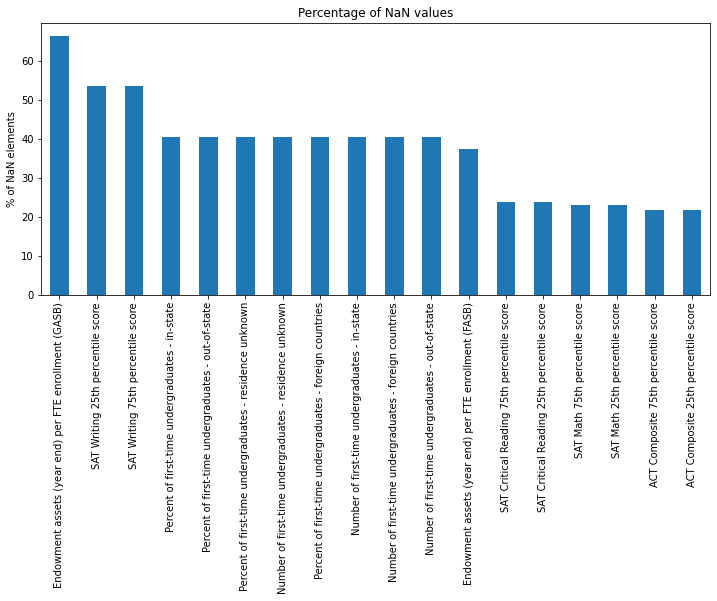

In [46]:

ax = s_cols_higher_null.plot.bar(title='Percentage of NaN values',figsize=(12,5));
ax.set_ylabel('% of NaN elements');

# All columns containing 20% of NaN values or more will be removed since those columns cannot be used as representative values. But before removing them, I'll create a copy of the data frame, and I'll continue working on this new data frame.

In [ ]:
type(s_cols_higher_null)
s_cols_higher_null.values
s_cols_higher_null.index
s_cols_higher_null["Endowment assets (year end) per FTE enrollment (GASB)"]

All columns containing 20% of NaN values or more will be removed since those columns cannot be used as representative values. But before removing them, I'll create a copy of the data frame, and I'll continue working on this new data frame.

In [ ]:
# universitiesnw_df=university_df.copy()
#universitiesnw_df.drop(list_colum_off,axis=1,inplace=True)
after_drop_df = university_df.drop(columns=s_cols_higher_null.index, axis=1)

In [ ]:
after_drop_df

In [40]:
#after_drop_df["Endowment assets (year end) per FTE enrollment (GASB)"]
after_drop_df.get("Endowment assets (year end) per FTE enrollment (GASB)" , default="NotExist")

NameError: name 'after_drop_df' is not defined

In [ ]:
after_drop_df.get("ID number" , default="NotExist")

In [ ]:
after_drop_df["ID number"]

# Selecting required cols , column selection process

In [ ]:
interesting_columns=['Name', 'year', 'Highest degree offered', "Offers Bachelor's degree",
       "Offers Master's degree",
       "Offers Doctor's degree - research/scholarship",
       "Offers Doctor's degree - professional practice", 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Total enrollment',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total',
       ]


In [ ]:
university_df_sel = university_df[interesting_columns]
university_df_sel

# -Invalid values
#### Now let's check if the data frame contains invalid values. These values can be more dangerous than missing values because they can produce errors that can be tricky to identify. First, we can try to find out if the data frame has negative values. It is supposed that, according to the context of this data frame, we will not find any negative value.

To perform this, we need to identify which columns contain numerical values. Only those columns will be assessed.

In [ ]:
numeric_col=university_df_sel.select_dtypes(include=['float64','int64']).columns
numeric_col

In [ ]:
# find out any < 0 in any of the numric cols 
#[(university_df_sel[c] <0) for c in numeric_col]
result =[]
for c in numeric_col:
    #print(university_df_sel[c])
    if any(university_df_sel[c] < 0) == True:
        result.append(c)
result
    

In [ ]:
# just any test , will check if any item is 0 
l = [1,0,2,3,4]
any(i ==0  for i in l)

    
        

# -Inconsistent values

According to the description chart, there are some universities which, for example, in 2013, had 0 applications in total, 0 admissions in total, and 0 enrollments in total. These are inconsistent values, and they need to be handled.

Let's find the total number of entries with 0 value.

In [ ]:
# below code will check all the each cell value for all rows and all col is = 0 or not and then count them.

zero_value_count = university_df_sel[university_df_sel.loc[0:]==0].count().sum()
print(f"dataset has {zero_value_count} zero values ")
 
    # dataset has 395 zero values


In the specific case of this data set, the entries with a zero value do not have sense; in fact, the most probable reason for them is that the information was not available at that time, but it doesn't mean they are 0. Therefore, I prefer to replace those entries with NaN values. In this way, if a pandas function is applied, none of those NaN values will be considered.

In [ ]:
import numpy as np
university_df_sel.replace(0,np.NaN,inplace=True)


#  2.2.Giving format to the colums **
mainly 3 things are very important
* 1- make all col small case
* 2- remove spaces
* 3- remove - , space inbetween , start and ending space. 
* 4- replace - with _

In [ ]:
def remove_special_char(col_names : str , char_set : list):
    new_col_names=[]
    for col in col_names:
        for ch in char_set:
            if ch == '\\' or ch == '-' or ch == '/' or ch == ' ':
                col = col.replace(ch , '_')
            elif ch in col:
                col = col.replace(ch ,'')
            col = col
        new_col_names.append(col)
    return new_col_names
                
   


In [ ]:
def remove_space(list_headers,charact): #charact should be: charact=[' - ',' ']
    new_headers=list()
    for header in list_headers:
        for char in charact:      
            if char in header:
                header=header.replace(char,'_')
            header=header
        new_headers.append(header)
    return new_headers

In [ ]:
remove_special_char(["a/b c" , "a-b"] , ['-','/' , ' '])
remove_space("A b c ",[' - ',' '])

In [ ]:
headers = remove_special_char(university_df_sel , ['-' ,' ', '/'])
#header = remove_space(university_df_sel , [['-' ,' ', '/']])

In [ ]:
university_df_sel.columns

In [ ]:
university_df_sel.columns = headers

* Besides removing spaces and replacing special characters, I'll change capitalized letters to avoid a typo of this kind.

In [ ]:
list_new_header=list()

for header in headers:
    header=header.casefold()   # All capitalized letters are changed.
    
    if "degrese" in header:    # One column name has a typo.  
        header=header.replace("degrese",'degrees')
            
    list_new_header.append(header)

In [ ]:
university_df_sel.columns = list_new_header
university_df_sel.columns

In [ ]:
university_df_sel.rename(columns={'state_abbreviation':'state'}, inplace=True)
university_df_sel['state'].to_frame().head(3)

* ## 3. *Exploratory Data Analysis (EDA) and Visualization. Quantitative and qualitative analysis (Asking and Answering Questions).*

# Data Analysis - Count no of students for each University in descending order

In [ ]:
university_df_sel.head(5)

In [ ]:
university_df_sel[["Name","year" , "Highest degree offered" , "Applicants total"] ]\
.sort_values(by="Applicants total" , ascending=False).head(5)


In [ ]:
# lets see another way ascending order 
university_df_sel[ ["Name","year" , "Highest degree offered" , "Applicants total"] ]\
.sort_values(by="Applicants total" , ascending=True).head(5)